<a href="https://colab.research.google.com/github/ilinashah177/Coursework-Website/blob/main/RDD_Coal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [71]:
from google.colab import files

# Upload the file
uploaded = files.upload()



Saving RDD_coal.xlsx to RDD_coal (1).xlsx


In [77]:
import pandas as pd

#Name of uploaded file
file_name ='RDD_coal.xlsx'

#Load the data into a pandas DataFrame
df = pd.read_excel(file_name)

#Calculate 'Time since 2015'
df['Time since 2015'] = df['Year '] - 2015

#Create 'Post-2015' indicator
df['Post-2015'] = (df['Year '] >= 2015).astype(int)

#Print the data
print(df)

    Year   Coal Consumption (TOE)  Time since 2015  Post-2015
0    2010                   50341               -5          0
1    2011                   43169               -4          0
2    2012                   46800               -3          0
3    2013                   28204               -2          0
4    2014                   71902               -1          0
5    2015                   67638                0          1
6    2016                   91463                1          1
7    2017                  384585                2          1
8    2018                 1984722                3          1
9    2019                 2640347                4          1
10   2020                 4875302                5          1


In [78]:
df

,Year,Coal Consumption (TOE),Time since 2015,Post-2015
0,2010,50341,-5,0
1,2011,43169,-4,0
2,2012,46800,-3,0
3,2013,28204,-2,0
4,2014,71902,-1,0
5,2015,67638,0,1
6,2016,91463,1,1
7,2017,384585,2,1
8,2018,1984722,3,1
9,2019,2640347,4,1


In [59]:
df['treatment'] = (df['Year '] >= 2015).astype(int)

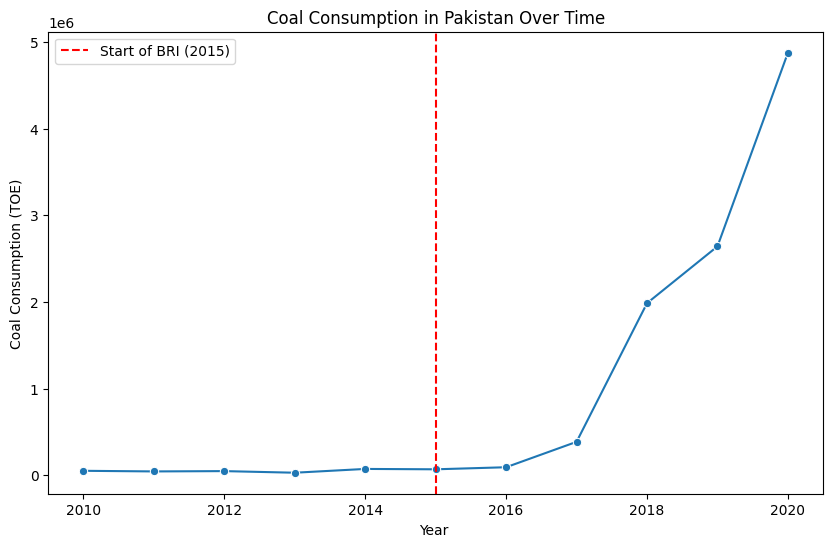

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot coal consumption over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year ', y='Coal Consumption (TOE)', data=df, marker='o')
plt.axvline(x=2015, color='red', linestyle='--', label='Start of BRI (2015)')
plt.title('Coal Consumption in Pakistan Over Time')
plt.xlabel('Year ')
plt.ylabel('Coal Consumption (TOE)')
plt.legend()
plt.show()

In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Regression model
model = smf.ols('Q("Coal Consumption (TOE)") ~ Q("Time since 2015") + Q("Post-2015") + Q("Time since 2015") * Q("Post-2015")', data=df)
results = model.fit()

#Print the summary of the regression
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     Q("Coal Consumption (TOE)")   R-squared:                       0.913
Model:                                     OLS   Adj. R-squared:                  0.875
Method:                          Least Squares   F-statistic:                     24.43
Date:                         Mon, 20 Jan 2025   Prob (F-statistic):           0.000440
Time:                                 01:14:35   Log-Likelihood:                -158.73
No. Observations:                           11   AIC:                             325.5
Df Residuals:                                7   BIC:                             327.0
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


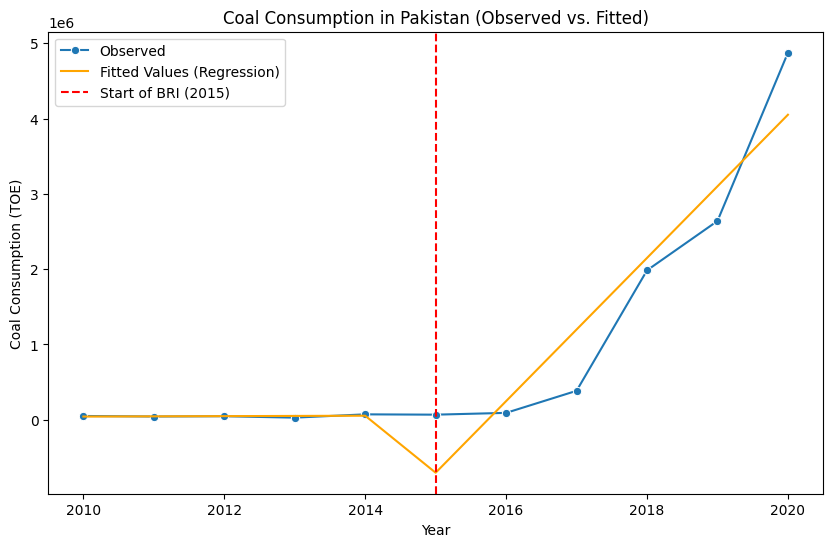

In [89]:
#Plotting the fitted values from the model
df['fitted_values'] = results.fittedvalues

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year ', y='Coal Consumption (TOE)', data=df, marker='o', label='Observed')
sns.lineplot(x='Year ', y='fitted_values', data=df, color='orange', label='Fitted Values (Regression)')
plt.axvline(x=2015, color='red', linestyle='--', label='Start of BRI (2015)')
plt.title('Coal Consumption in Pakistan (Observed vs. Fitted)')
plt.xlabel('Year')
plt.ylabel('Coal Consumption (TOE)')
plt.legend()
plt.show()

In [96]:
#Placebo test example, shifting cutoff to 2016
df['Post-2016'] = (df['Year '] >= 2016).astype(int)
model_placebo = smf.ols('Q("Coal Consumption (TOE)") ~ Q("Time since 2015") + Q("Post-2016") + Q("Time since 2015") * Q("Post-2016")', data=df)
results_placebo = model_placebo.fit()

#Print the summary of the placebo test
print(results_placebo.summary())

                                 OLS Regression Results                                
Dep. Variable:     Q("Coal Consumption (TOE)")   R-squared:                       0.962
Model:                                     OLS   Adj. R-squared:                  0.946
Method:                          Least Squares   F-statistic:                     59.57
Date:                         Mon, 20 Jan 2025   Prob (F-statistic):           2.38e-05
Time:                                 01:24:17   Log-Likelihood:                -154.12
No. Observations:                           11   AIC:                             316.2
Df Residuals:                                7   BIC:                             317.8
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
